In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor']='w'

In [2]:

teledf = pd.read_csv('telcomarketing.csv')

In [3]:
#basic discovery

teledf.sample(20)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
660,NC,64,510,Yes,Yes,33,127.2,93,21.62,162.9,104,13.85,247.4,109,11.13,8.1,13,2.19,0,False
815,VA,99,415,No,Yes,42,216.0,125,36.72,232.3,104,19.75,215.5,100,9.70,9.3,4,2.51,2,True
1242,WV,94,415,No,No,0,85.9,113,14.60,226.7,91,19.27,279.6,110,12.58,15.6,16,4.21,0,False
685,MD,42,408,No,No,0,196.5,89,33.41,241.3,123,20.51,143.2,105,6.44,4.0,7,1.08,0,False
1835,OR,80,415,No,No,0,113.2,86,19.24,185.5,97,15.77,237.3,145,10.68,9.5,5,2.57,1,False
1292,WY,131,510,No,No,0,110.9,74,18.85,115.6,90,9.83,190.5,114,8.57,15.8,9,4.27,1,False
2605,RI,138,510,Yes,No,0,286.2,61,48.65,187.2,60,15.91,146.2,114,6.58,11.0,4,2.97,2,True
1411,IL,85,415,No,Yes,29,144.6,97,24.58,140.0,102,11.90,165.4,148,7.44,10.9,3,2.94,1,False
2010,NE,103,408,No,No,0,160.8,91,27.34,155.8,82,13.24,254.3,103,11.44,8.5,3,2.30,1,False
898,LA,9,415,No,Yes,39,214.1,108,36.40,169.2,115,14.38,189.7,117,8.54,10.1,3,2.73,1,False


In [4]:
teledf.shape

(3333, 20)

In [5]:
teledf.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [6]:
teledf.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [7]:
teledf.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [8]:
#total column

teledf['Total minutes'] = teledf.loc[:,teledf.columns.str.endswith('minutes')].sum(axis=1)
teledf['Total calls'] = teledf.loc[:,teledf.drop(columns='Customer service calls').columns.str.endswith('calls')].sum(axis=1)
teledf['Total charge'] = teledf.loc[:,teledf.columns.str.endswith('charge')].sum(axis=1)

In [9]:
#QC

teledf.head()
teledf.shape
teledf.sample(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total minutes,Total calls,Total charge
520,CT,105,408,No,No,0,213.4,100,36.28,204.9,...,93,8.09,9.5,6,2.57,1,False,607.5,251,64.36
489,OR,151,510,No,No,0,156.4,108,26.59,233.4,...,141,8.81,7.7,6,2.08,4,False,593.2,373,57.32
870,WV,30,510,No,No,0,162.3,96,27.59,244.0,...,89,8.10,9.1,4,2.46,2,False,595.5,311,58.89
1395,TN,127,415,No,Yes,28,235.6,124,40.05,236.8,...,127,10.85,7.7,2,2.08,1,False,721.3,366,73.11
2759,NV,124,408,No,No,0,151.1,123,25.69,187.4,...,93,11.49,5.3,3,1.43,1,False,599.2,323,54.54
3053,TX,119,510,No,No,0,81.9,75,13.92,253.8,...,125,9.59,8.9,1,2.40,2,True,557.7,315,47.48
1768,PA,97,510,Yes,No,0,145.0,103,24.65,294.3,...,120,10.79,11.0,2,2.97,4,True,690.1,318,63.43
3272,CO,130,408,No,No,0,271.8,129,46.21,237.2,...,91,9.45,8.7,2,2.35,4,True,727.8,350,78.17
1392,OH,134,408,No,No,0,202.7,105,34.46,224.9,...,108,11.43,12.1,7,3.27,0,False,693.6,310,68.28
2178,OR,72,510,No,No,0,141.3,133,24.02,134.9,...,97,10.24,11.2,3,3.02,2,False,514.9,329,48.75


In [10]:
#dummies

teledf = teledf.replace({'International plan':{'Yes':1,'No':0}})
teledf = teledf.replace({'Voice mail plan':{'Yes':1,'No':0}})
teledf['Churn'] = teledf['Churn'].astype(int)

In [11]:
#QC

teledf.head()
teledf.shape
teledf.sample(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total minutes,Total calls,Total charge
2112,AR,88,408,0,0,0,152.9,119,25.99,171.2,...,106,11.57,12.0,5,3.24,2,0,593.1,337,55.35
854,NC,64,408,0,1,19,291.1,150,49.49,226.7,...,67,9.86,7.5,2,2.03,1,0,744.4,342,80.65
2312,CT,124,415,0,0,0,151.0,98,25.67,120.6,...,81,6.88,9.2,2,2.48,2,0,433.6,300,45.28
1524,HI,134,408,0,0,0,242.4,126,41.21,152.9,...,115,14.32,11.8,6,3.19,1,0,725.4,362,71.72
1260,NJ,85,415,0,0,0,236.9,93,40.27,197.7,...,78,13.91,11.4,7,3.08,2,1,755.1,291,74.06
1715,MT,100,415,0,0,0,96.5,86,16.41,210.2,...,106,6.59,12.5,3,3.38,1,1,465.6,328,44.25
3001,TX,71,415,0,1,39,183.2,103,31.14,209.4,...,109,7.76,11.9,6,3.21,1,0,576.9,329,59.91
519,NY,140,415,0,0,0,235.5,81,40.04,257.2,...,111,4.64,11.5,4,3.11,2,0,607.3,326,69.65
2517,CT,147,415,0,0,0,124.4,74,21.15,320.9,...,126,7.07,10.4,4,2.81,2,0,612.9,282,58.31
1778,TX,98,415,0,0,0,217.2,121,36.92,303.4,...,71,8.87,12.4,2,3.35,0,1,730.1,267,74.93


In [12]:
teledf.describe()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total minutes,Total calls,Total charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,...,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,591.864776,305.137114,59.449754
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,...,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,89.954251,34.448164,10.502261
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,284.300000,191.000000,22.930000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,...,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,531.500000,282.000000,52.380000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,...,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,593.600000,305.000000,59.470000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,...,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,652.400000,328.000000,66.480000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,...,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,885.000000,416.000000,96.150000


In [28]:
#what to bin

to_bin = teledf.iloc[:,6:18].join(teledf.iloc[:,-3])
to_bin = to_bin.join(teledf['Account length'])
to_bin = to_bin.drop(columns='Total intl calls')
to_bin.tail()

,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl charge,Total minutes,Account length
3328,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,3.11,551.9,114
3329,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,2.19,525.1,106
3330,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,3.56,502.2,60
3331,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,3.13,572.8,159
3332,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,1.35,517.6,184


In [14]:
#bin continuous variables

bins = []

for i in to_bin.columns:
    bins.append(pd.cut(to_bin[i],10, labels=range(1,11)))

In [24]:
bindf=pd.DataFrame(bins).transpose()
bindf.tail()

,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl charge,Total minutes,Account length
3328,4,6,4,5,8,5,7,5,7,6,6,5,5
3329,3,8,3,6,8,6,6,3,6,5,5,5,5
3330,6,8,6,3,7,3,6,8,6,7,7,4,3
3331,5,7,5,6,7,6,5,4,5,6,6,5,7
3332,7,7,7,5,5,5,4,8,4,3,3,4,8


In [27]:
bindf['Total day minutes'].iloc[3332]
teledf['Total day minutes'].iloc[3332]

213.8

In [29]:
#function to turn zero values in dataframe to zero in binned dataframe

def binzero (x):
    for i in range(0,3333):
        if teledf[x].iloc[i] == 0:
            bindf[x].iloc[i] = 0
        else:
            pass
        


In [30]:
for i in bindf.columns:
    binzero(i)

In [33]:
#QC by summing zeroes

(bindf==0).sum()

Total day minutes       2
Total day calls         2
Total day charge        2
Total eve minutes       1
Total eve calls         1
Total eve charge        1
Total night minutes     0
Total night calls       0
Total night charge      0
Total intl minutes     18
Total intl charge      18
Total minutes           0
Account length          0
dtype: int64

In [37]:
(to_bin==0).sum()

Total day minutes       2
Total day calls         2
Total day charge        2
Total eve minutes       1
Total eve calls         1
Total eve charge        1
Total night minutes     0
Total night calls       0
Total night charge      0
Total intl minutes     18
Total intl charge      18
Total minutes           0
Account length          0
dtype: int64

In [40]:
bindf = bindf.add_prefix('Bin_')

In [41]:
#QC

bindf.head()
bindf.shape
bindf.sample(10)

,Bin_Total day minutes,Bin_Total day calls,Bin_Total day charge,Bin_Total eve minutes,Bin_Total eve calls,Bin_Total eve charge,Bin_Total night minutes,Bin_Total night calls,Bin_Total night charge,Bin_Total intl minutes,Bin_Total intl charge,Bin_Total minutes,Bin_Account length
230,6,8,6,4,6,4,5,4,5,5,5,5,6
1863,5,4,5,6,6,6,8,6,8,5,5,7,3
1415,5,8,5,7,6,7,5,5,5,7,7,6,3
2007,3,7,3,8,7,8,6,5,6,5,5,5,6
1314,5,5,5,5,7,5,5,3,5,3,3,4,6
556,6,5,6,5,6,5,5,4,5,5,5,5,6
520,7,7,7,6,4,6,5,5,5,5,5,6,5
134,3,7,3,4,8,4,6,4,6,7,7,4,3
1972,6,8,6,5,6,5,5,6,5,8,8,5,8
3079,6,7,6,6,6,6,4,5,4,6,6,5,2


In [44]:
#final datasets

teledf_all = teledf.join(bindf)
teledf_bins = teledf_all.drop(columns = to_bin.columns)
teledf_churn = teledf_all[teledf_all['Churn']==1].drop(columns = to_bin.columns)
teledf_nochurn = teledf_all[teledf_all['Churn']==0].drop(columns = to_bin.columns)

In [43]:
#QC

teledf_all.head()
#teledf_bins.head()
#teledf_churn['Churn'].value_counts()
#teledf_nochurn['Churn'].value_counts()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Bin_Total eve minutes,Bin_Total eve calls,Bin_Total eve charge,Bin_Total night minutes,Bin_Total night calls,Bin_Total night charge,Bin_Total intl minutes,Bin_Total intl charge,Bin_Total minutes,Bin_Account length
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,6,6,6,6,5,6,5,5,8,6
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,6,7,6,7,5,7,7,7,6,5
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,4,7,4,4,5,4,7,7,5,6
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,2,6,2,5,4,5,4,4,5,4
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,5,8,5,5,7,5,6,6,4,4


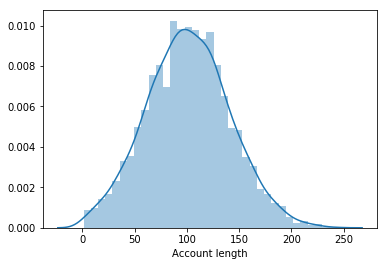

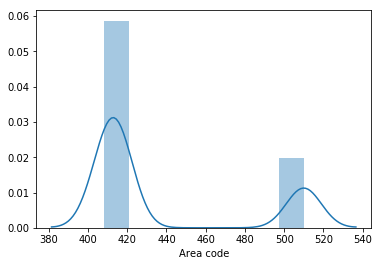

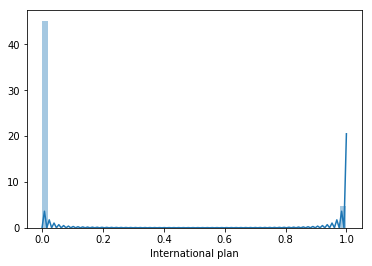

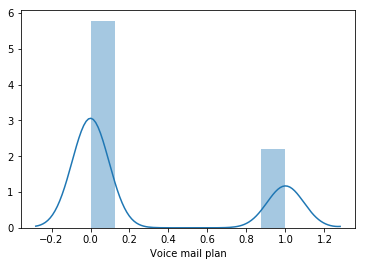

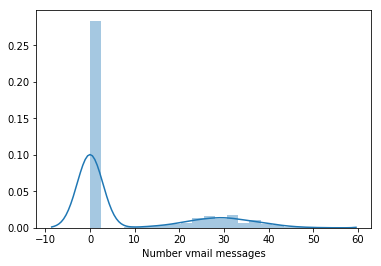

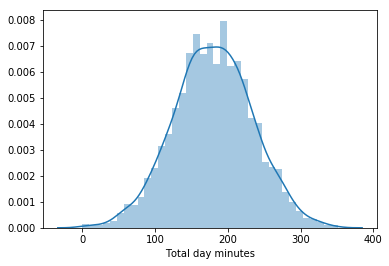

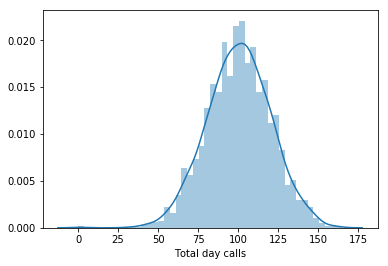

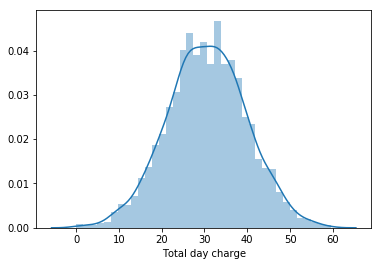

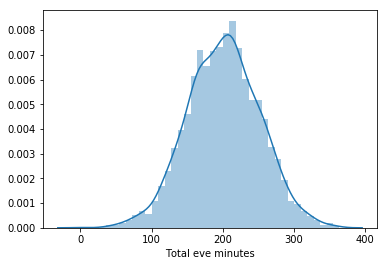

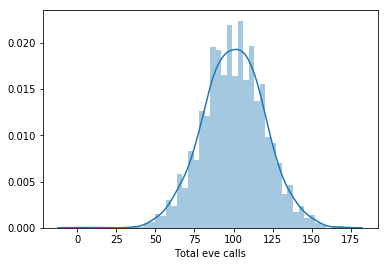

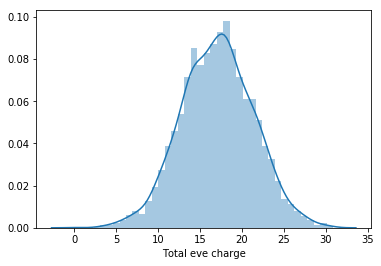

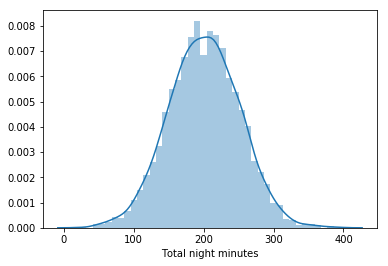

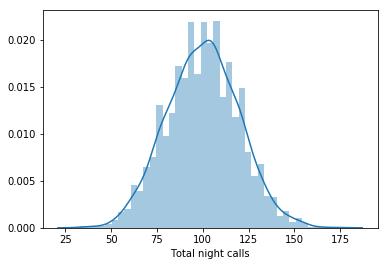

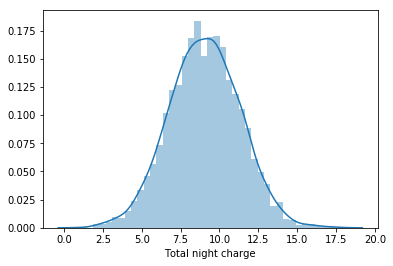

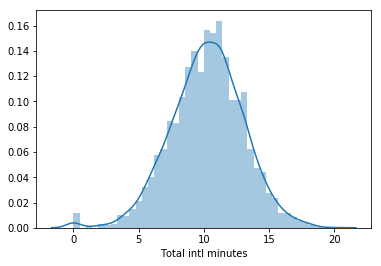

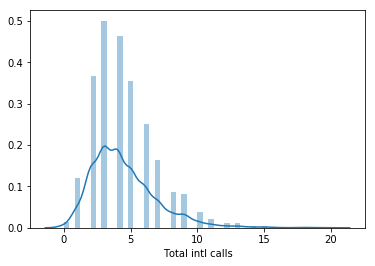

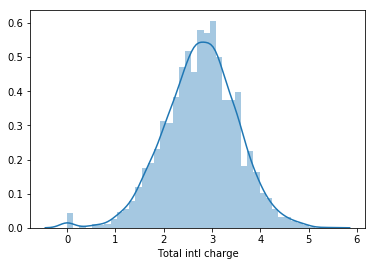

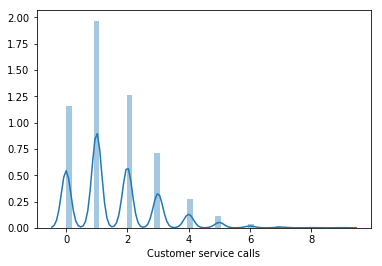

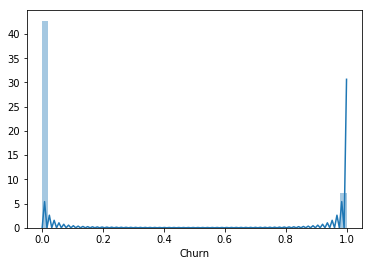

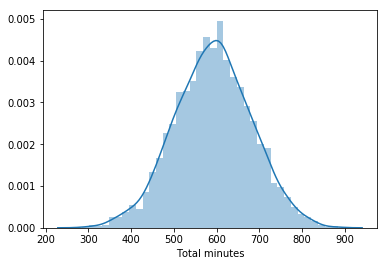

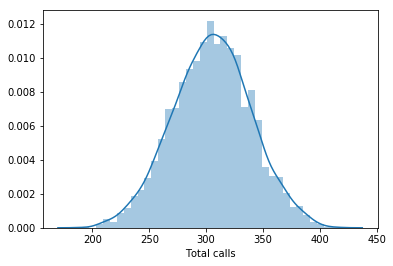

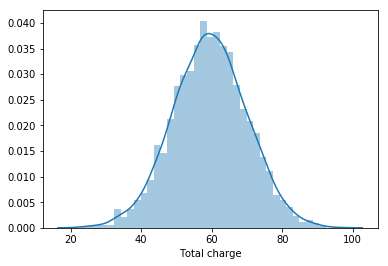

In [43]:
for i in teledf.drop(columns='State').columns:
    sns.distplot(teledf[i])
    plt.show()

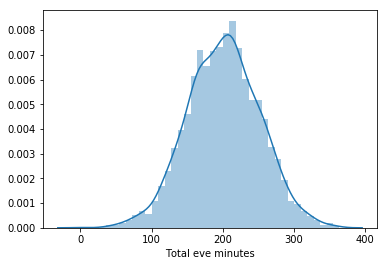

In [41]:
sns.distplot(teledf['Total eve minutes'])

In [45]:
#export datasets for analysis notebook

teledf.to_csv('teledf.csv')
teledf_all.to_csv('teledf_all.csv')
teledf_bins.to_csv('teledf_bins.csv')
teledf_churn.to_csv('teledf_churn.csv')
teledf_nochurn.to_csv('teledf_nochurn.csv')

In [19]:
#basic testing
#run after changes in dataset

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from scipy.cluster.hierarchy import dendrogram, linkage

In [20]:
X = teledf.drop(columns = ['State'])

#scaler = StandardScaler() #poor results
scaler = MinMaxScaler()
pca = PCA(n_components=3)

X_scaled = scaler.fit_transform(X)
X_scaled_pca = pca.fit_transform(X_scaled)

In [21]:
kmeans = KMeans()
dbscan = DBSCAN()
aggclus = AgglomerativeClustering()


In [22]:
sil_score = []

for i in [kmeans, aggclus, dbscan]:
    i.fit(X_scaled_pca)

In [23]:
silhouette_score(X_scaled, kmeans.labels_)

0.32937337673323785

In [24]:
silhouette_score(X_scaled, aggclus.labels_)

0.30729371902352476

In [25]:
silhouette_score(X_scaled, dbscan.labels_)

0.2974566104643387